# Module 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir('/home/skystone/Documents/internship')

# Query 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock This would be helpful if we are to train our model to take NLP inputs.


In [3]:
dataset = pd.read_csv('Module1Solutions.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'].dtype

dtype('<M8[ns]')

In [4]:
dataset.set_index('Date')

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,5,2017,1375.650000,0.000000,Slight or No Change
2017-05-16,1,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,5,2017,1371.182580,-0.006760,Slight or No Change
2017-05-17,2,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,5,2017,1374.698599,0.009112,Slight or No Change
2017-05-18,3,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,5,2017,1366.416995,-0.018821,Slight or No Change
2017-05-19,4,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,5,2017,1358.719717,-0.014377,Slight or No Change
2017-05-22,5,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90,5,2017,1353.765917,-0.020361,Slight or No Change
2017-05-23,6,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17,5,2017,1350.589012,0.019522,Slight or No Change
2017-05-24,7,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10,5,2017,1346.239034,-0.017346,Slight or No Change
2017-05-25,8,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23,5,2017,1342.594090,0.014404,Slight or No Change


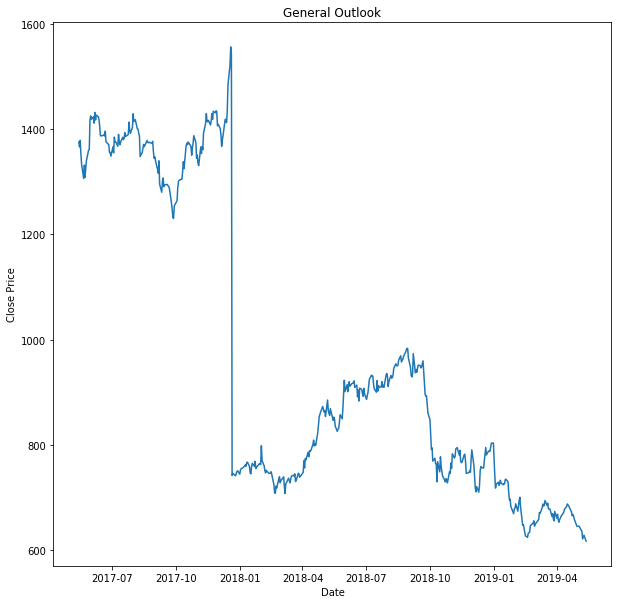

In [5]:

# Ploting Date Vs Close Price
plt.figure(figsize=(10,10))
plt.plot(dataset['Date'],dataset['Close Price'])
plt.title("General Outlook")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [21]:
# From graph we can see that there is drastic changes at 2 points
# and when we look at data from csv those dates are
# 21-12-2017 drops below half in one day
# 21-09-2018 starts decreasing for 10 days


from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 

url_21_12_2017 = 'https://www.moneycontrol.com/news/business/markets/d-street-buzz-psu-bank-auto-stocks-slip-led-by-bob-m-zee-ent-spikes-7-indiabulls-housing-tanks-4302961.html'

response = requests.get(url_21_12_2017) 
soup = BeautifulSoup(response.content,"html.parser")

#list(soup.children)
[type(item) for item in list(soup.children)]
html = list(soup.children)[2]



stock_news_title_container = soup.find(class_ = 'articleData clr')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('article',class_ = 'Normal')

print("Money Control News")
print("News for 21-12-2017")
print('\n')
print("Title:")
print (soup.find(class_ = "artTitle").get_text())
print('\n')
print("Subject:")
print (soup.find(class_ = "subhead").get_text())
print('\n')
print("Report:")
print(soup.select("div p"))


Money Control News
News for 21-12-2017


Title:
D-Street Buzz: PSU Bank, auto stocks slip led by BoB, M&M Zee Ent spikes 7%, Indiabulls Housing tanks


Subject:
The top gainers from NSE include Zee Entertainment, YES Bank, Cipla, Hindustan Unilever and IndusInd Bank while the top losers are Indiabulls Housing Finance, Tata Steel, Mahindra & Mahindra, Tata Motors and BPCL.


Report:
[<p>Following a 35bps rate by the Reserve Bank of India and after trading on a flat to positive note, the Indian stock market has once again slipped into the red with Nifty down 40 points to 10,908 while the Sensex shed 111 points to 36,869.</p>, <p>Nifty PSU Bank is down over 2 percent dragged by Bank of Baroda, Punjab National Bank, State Bank of India, Bank of India, Indian Bank and Union Bank of India.</p>, <p>Auto stocks have slipped further into the red. The top losers are Tata  Motors, Mahindra &amp; Mahindra, Ashok Leyland, Bharat Forge, Bosch, Motherson Sumi Systems, Eicher Motors and Tata Motors DV

# Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

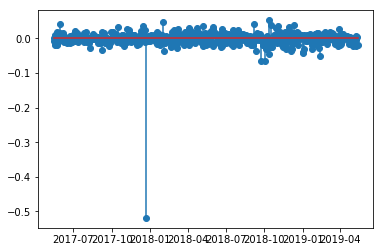

In [12]:
import matplotlib.pyplot as plt
plt.stem(dataset['Date'],dataset['Day_Perc_Change'])

# Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

<StemContainer object of 3 artists>

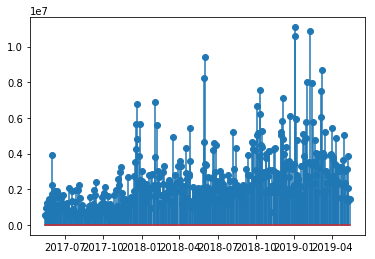

In [13]:
plt.stem(dataset['Date'],dataset['Total Traded Quantity'])

<StemContainer object of 3 artists>

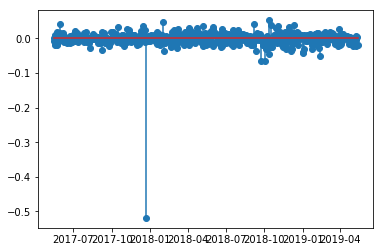

In [14]:
plt.stem(dataset['Date'],dataset['Day_Perc_Change'])

<StemContainer object of 3 artists>

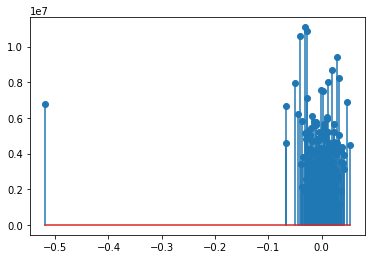

In [15]:
plt.stem(dataset['Day_Perc_Change'],dataset['Total Traded Quantity'])

<StemContainer object of 3 artists>

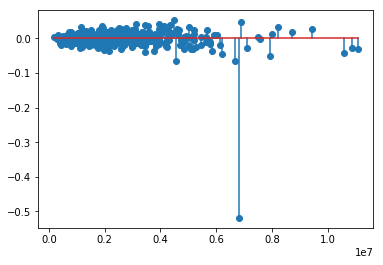

In [16]:
plt.stem(dataset['Total Traded Quantity'],dataset['Day_Perc_Change'])

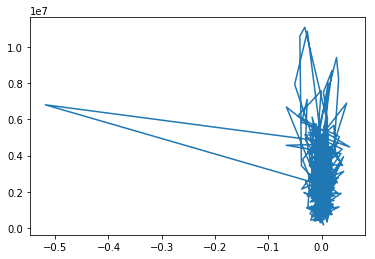

In [17]:
plt.plot(dataset['Day_Perc_Change'],dataset['Total Traded Quantity'])

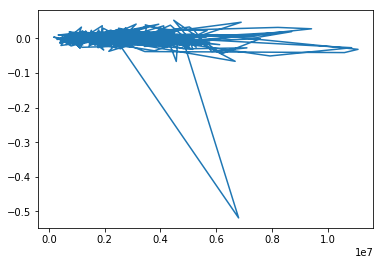

In [18]:
plt.plot(dataset['Total Traded Quantity'],dataset['Day_Perc_Change'])

# Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [19]:
import matplotlib.pyplot as plt 
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trends_to_list = dataset['Trend'].tolist()
counts = Counter(Trends_to_list)
counts


Counter({'Slight or No Change': 494})

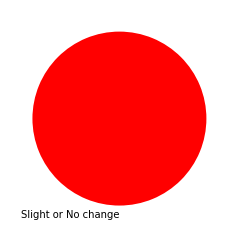

In [20]:
# So we only have 1 trend so there will be only 1 color pie chart 
counter = [494]
labels = ['Slight or No change']
colors = ['r']
plt.pie(counter,labels=labels,colors=colors,startangle=90)
plt.show()


In [21]:
# we will find avg of each trend type
# but here we have only onr trend ie slight or no change
bg = dataset.groupby(['Trend'])['Total Traded Quantity']
bg.describe()


,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No Change,494.0,2.399657e+06,1.638213e+06,175195.0,1300886.25,2037748.0,3006416.5,11084172.0


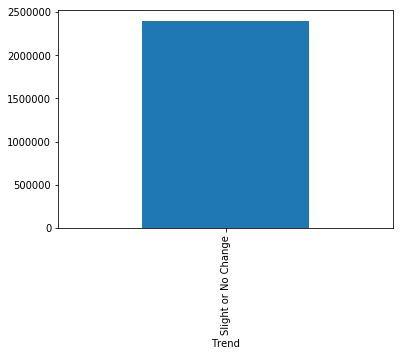

In [22]:
dataset.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

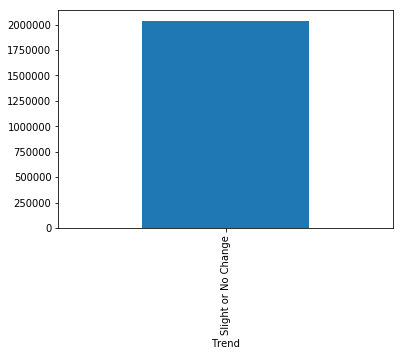

In [23]:
dataset.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()


# Query 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .


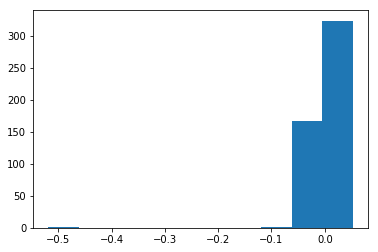

In [24]:
plt.hist(dataset['Day_Perc_Change'])
plt.show()


# Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [25]:
import pandas as pd
airtel_stock = pd.read_csv('airtel_stock_data.csv')
cub_stock = pd.read_csv('cub_stock_data.csv')
itc_stock = pd.read_csv('itc_stock_data.csv')
tcs_stock = pd.read_csv('tcs_stock_data.csv')
wipro_stock = pd.read_csv('wipro_stock_data.csv')


In [26]:
airtel_stock_filt = airtel_stock[airtel_stock.Series == 'EQ']
cub_stock_filt = cub_stock[cub_stock.Series == 'EQ']
itc_stock_filt = itc_stock[itc_stock.Series == 'EQ']
tcs_stock_filt = tcs_stock[tcs_stock.Series == 'EQ']
wipro_stock_filt = wipro_stock[wipro_stock.Series == 'EQ']


In [27]:
dataFrame_ClosePrice = pd.DataFrame(columns = ['airtel','cub','itc','tcs','wipro'])
dataFrame_ClosePrice['airtel'] = airtel_stock_filt['Close Price']
dataFrame_ClosePrice['cub'] = cub_stock_filt['Close Price']
dataFrame_ClosePrice['itc'] = itc_stock_filt['Close Price']
dataFrame_ClosePrice['tcs'] = tcs_stock_filt['Close Price']
dataFrame_ClosePrice['wipro'] = wipro_stock_filt['Close Price']
dataFrame_ClosePrice.dropna()

,airtel,cub,itc,tcs,wipro
0,381.30,180.00,337.10,2347.55,257.75
1,385.90,181.55,334.30,2331.95,257.70
2,405.70,184.80,333.30,2434.95,268.25
3,395.45,183.50,330.40,2475.80,263.20
4,397.10,183.05,328.85,2439.45,263.80
5,403.15,174.15,338.75,2446.40,264.05
6,407.00,172.45,337.15,2397.45,259.85
7,408.45,169.60,325.15,2395.45,266.85
8,408.30,166.70,284.55,2408.35,269.00
9,421.25,164.05,291.45,2449.60,271.10


In [28]:
dataFrame_pctChange = dataFrame_ClosePrice.pct_change()
dataFrame_pctChange.dropna()


,airtel,cub,itc,tcs,wipro
1,0.012064,0.008611,-0.008306,-0.006645,-0.000194
2,0.051309,0.017901,-0.002991,0.044169,0.040939
3,-0.025265,-0.007035,-0.008701,0.016777,-0.018826
4,0.004172,-0.002452,-0.004691,-0.014682,0.002280
5,0.015235,-0.048621,0.030105,0.002849,0.000948
6,0.009550,-0.009762,-0.004723,-0.020009,-0.015906
7,0.003563,-0.016527,-0.035592,-0.000834,0.026939
8,-0.000367,-0.017099,-0.124865,0.005385,0.008057
9,0.031717,-0.015897,0.024249,0.017128,0.007807
10,-0.003442,-0.015239,-0.006691,-0.002000,-0.007193


/home/skystone/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/skystone/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


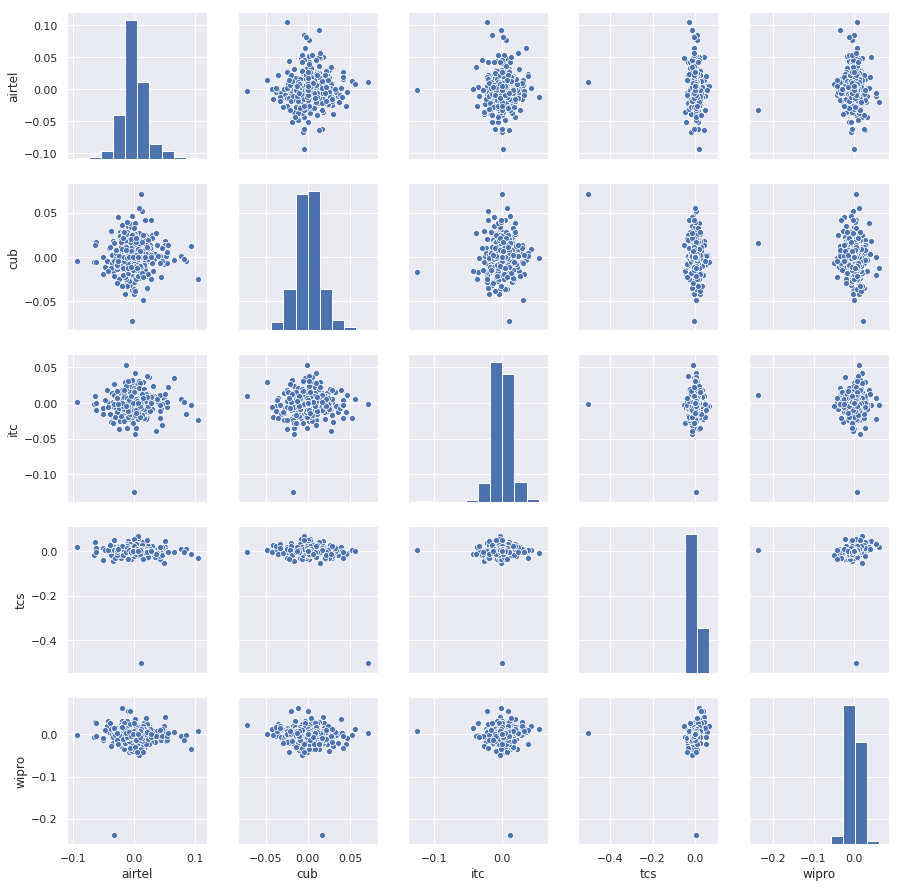

In [29]:
import seaborn as sns
sns.set(color_codes = True)
sns.pairplot(dataFrame_pctChange)


# Query 2.7
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [31]:
import matplotlib.pyplot as plt

# rolling avg of pct change
rolling_average_airtel = []
rolling_average_airtel = dataFrame_pctChange['airtel'].rolling(7).mean()


In [32]:
# standard deviation
standard_deviation_airtel = rolling_average_airtel.fillna(0).std()
standard_deviation_airtel


0.00807927673063182

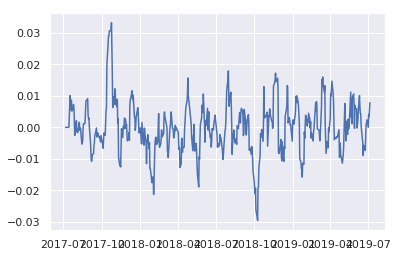

In [33]:
# plot the values
dateList = pd.to_datetime(airtel_stock_filt['Date']).tolist() 
rollingAvgList = rolling_average_airtel.fillna(0).tolist()
plt.plot( dateList ,  rollingAvgList )
plt.show()

# Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

In [34]:
nifty_data = pd.read_csv('Nifty50.csv')

In [37]:
nifty_ClosePrice = nifty_data['Close']
nifty_pct_change = nifty_ClosePrice.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifty_date = pd.to_datetime(nifty_data['Date'])
nifty_date_list = nifty_date.tolist()

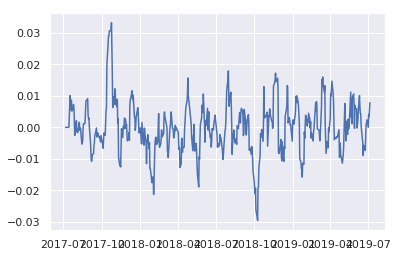

In [55]:
cub_Date = pd.to_datetime(cub_stock_filt['Date'])
cub_Date_list = cub_Date.tolist()
cub_ClosePrice = cub_stock_filt['Close Price']
cub_pct_change = cub_ClosePrice.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.plot(cub_Date_list,rolling_average_airtel.fillna(0).tolist())


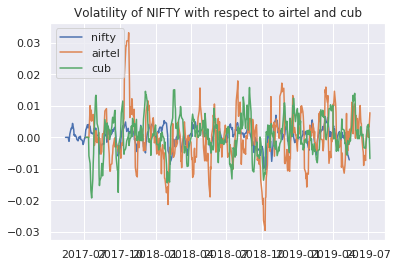

In [53]:
plt.title("Volatility of NIFTY with respect to airtel and cub")
plt.plot(nifty_date,nifty_pct_change.tolist(),label = 'nifty')
plt.plot(dateList,rolling_average_airtel.fillna(0).tolist(),label = 'airtel')
plt.plot(cub_Date_list,cub_pct_change,label = 'cub')
plt.legend(loc='upper left')
plt.show()

# Query 2.9
Trade Calls - Using Simple Moving Averages. Study about moving averages here. 

Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

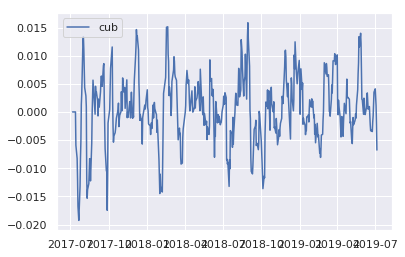

In [56]:
#cub stocks for applying buy/sell signals

plt.plot(cub_Date_list,cub_pct_change,label = 'cub')
plt.legend(loc='upper left')
plt.show()

In [59]:
#making short and long signals
short_window = 21
long_window = 34
signals = pd.DataFrame(index=cub_stock_filt.index)
signals['signal'] = 0.0

signals['short_mavg'] = cub_stock_filt['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

signals['long_mavg'] = cub_stock_filt['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

signals['positions'] = signals['signal'].diff()
print(signals)


     signal  short_mavg   long_mavg  positions
0       0.0  180.000000  180.000000        NaN
1       0.0  180.775000  180.775000        0.0
2       0.0  182.116667  182.116667        0.0
3       0.0  182.462500  182.462500        0.0
4       0.0  182.580000  182.580000        0.0
5       0.0  181.175000  181.175000        0.0
6       0.0  179.928571  179.928571        0.0
7       0.0  178.637500  178.637500        0.0
8       0.0  177.311111  177.311111        0.0
9       0.0  175.985000  175.985000        0.0
10      0.0  174.672727  174.672727        0.0
11      0.0  173.420833  173.420833        0.0
12      0.0  172.288462  172.288462        0.0
13      0.0  171.600000  171.600000        0.0
14      0.0  171.050000  171.050000        0.0
15      0.0  170.862500  170.862500        0.0
16      0.0  170.667647  170.667647        0.0
17      0.0  170.983333  170.983333        0.0
18      0.0  171.192105  171.192105        0.0
19      0.0  171.195000  171.195000        0.0
20      0.0  

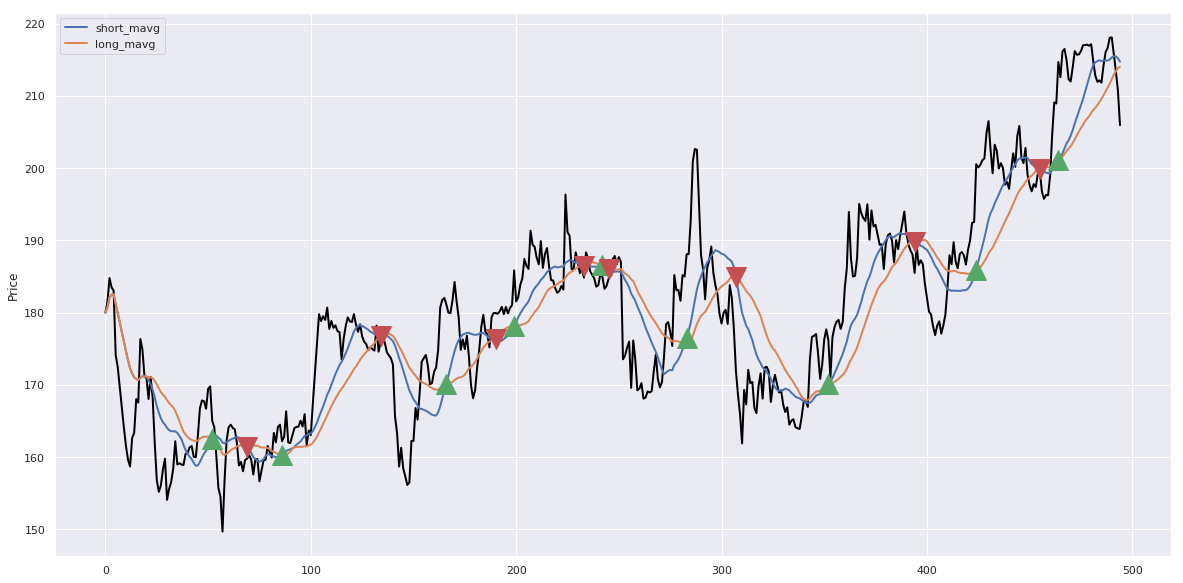

In [68]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel='Price')
cub_stock_filt['Close Price'].plot(ax=ax1, color='black', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')
plt.show()

# Query 2.10
2.10 Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'CUB'
# read csv file, use date as index and read close as a column
df = pd.read_csv('cub_stock_data.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

In [64]:
# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()
# calculate the standar deviation
rstd = df.rolling(window=14).std()

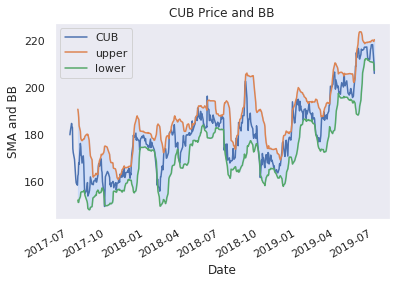

In [65]:
upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()